# Proyek Analisis Data: Bike Sharing Dataset
- Nama: Moh Raihan Romadhoni
- Email:mohraihanromadhoni2002@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Bagaimana tren penggunaan sepeda  setiap bulan dan tahun? Apakah ada peningkatan atau penurunan yang signifikan?
- Bagaimana pola penggunaan sepeda berdasarkan hari kerja  dan hari libur? Apakah ada perbedaan yang signifikan?

## Menyaipkan semua library yang dibutuhkan

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import calendar

## Data Wrangling

### Gathering Data

In [4]:
day_df = pd.read_csv('data/day.csv')


### Assessing Data

#### Dataset Day

In [5]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [6]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
day_df.duplicated().sum()

0

In [8]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [9]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


## Exploratory Data Analysis (EDA)

### Explore ...

In [10]:
day_df.describe(include="all")

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,NaN,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000


In [11]:
day_df.groupby(by="workingday").agg({"instant":"nunique","cnt":["max","min","mean","std"]})

instant   cnt                               
           nunique   max  min         mean          std
workingday                                             
0              231  8714  605  4330.168831  2052.141245
1              500  8362   22  4584.820000  1878.415583

In [12]:
day_df.groupby(by="weekday").agg({"instant":"nunique","cnt":["max","min","mean","std"]})

instant   cnt                                
        nunique   max   min         mean          std
weekday                                              
0           105  8227   605  4228.828571  1872.496629
1           105  7525    22  4338.123810  1793.074013
2           104  7767   683  4510.663462  1826.911642
3           104  8173   441  4548.538462  2038.095884
4           104  7804   431  4667.259615  1939.433317
5           104  8362  1167  4690.288462  1874.624870
6           105  8714   627  4550.542857  2196.693009

In [13]:
day_df.groupby(by="yr").agg({"instant":"nunique","cnt":["max","min","mean","std"]})

instant   cnt                               
   nunique   max  min         mean          std
yr                                             
0      365  6043  431  3405.761644  1378.753666
1      366  8714   22  5599.934426  1788.667868

## Visualization & Explanatory Analysis

### Pertanyaan 1:

#### visualisasi secara general

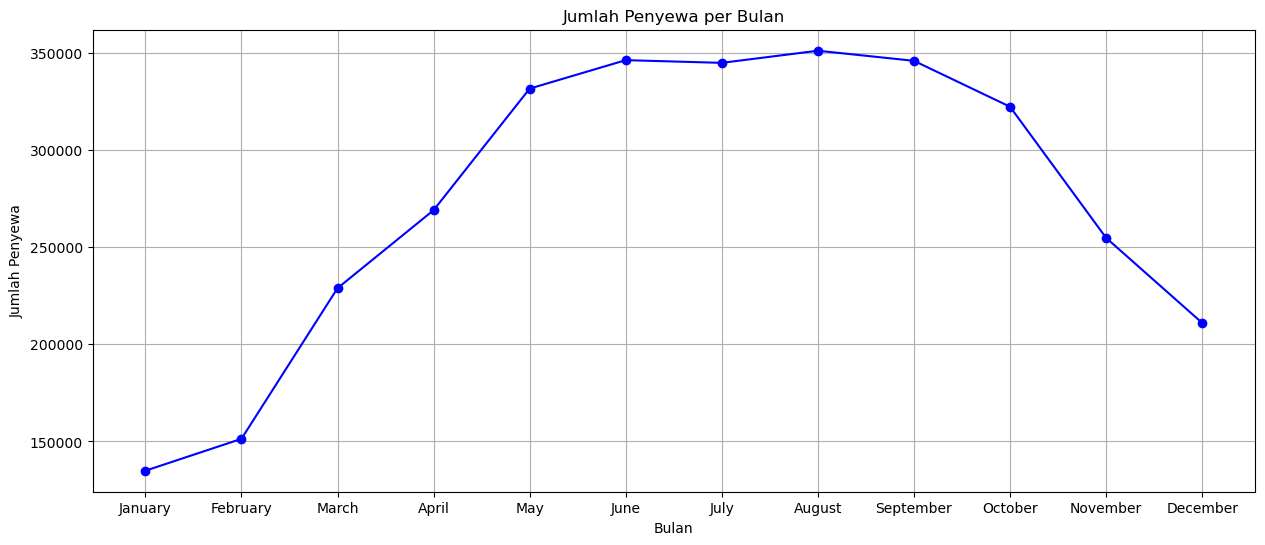

In [14]:

month_data = day_df.groupby('mnth')['cnt'].sum()

month_data.index = month_data.index.map(lambda x: calendar.month_name[int(x)])

plt.figure(figsize=(15, 6))
plt.plot(month_data.index, month_data.values, marker='o', linestyle='-', color='b')
plt.title('Jumlah Penyewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.grid(True)
plt.show()


### visualisasi berdasarkan bulan

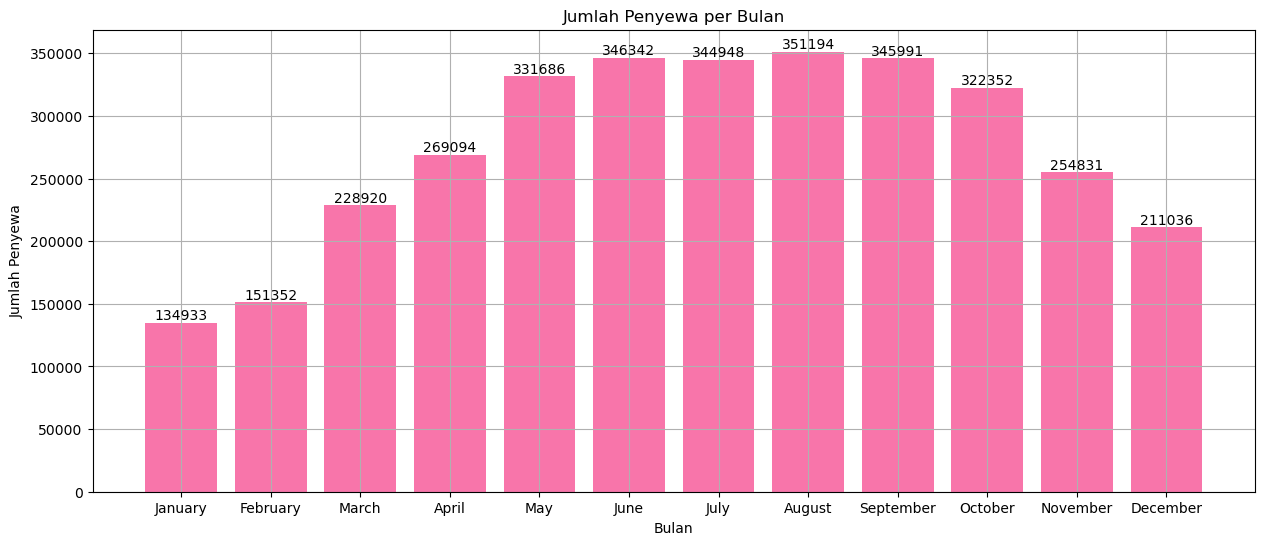

In [15]:
month_data = day_df.groupby('mnth')['cnt'].sum()

month_data.index = month_data.index.map(lambda x: calendar.month_name[int(x)])

plt.figure(figsize=(15, 6))
plt.bar(month_data.index, month_data.values, color='#F875AA')
plt.title('Jumlah Penyewa per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewa')
plt.grid(True)

for i, v in enumerate(month_data.values):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.show()

### visualisasi berdasarkan tahun

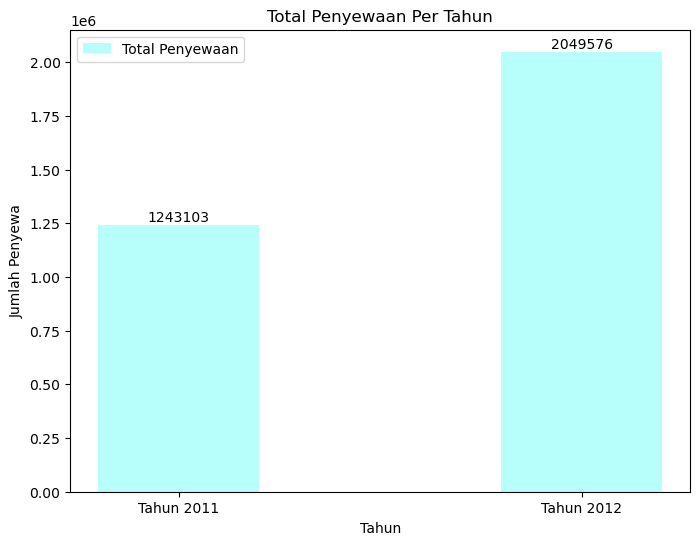

In [16]:
year_total = day_df.groupby('yr')['cnt'].sum()

years = year_total.index
total_year = year_total.values

plt.figure(figsize=(8, 6))

plt.bar(years, total_year, width=0.4, label='Total Penyewaan', color='#B6FFFA')

plt.xlabel("Tahun")
plt.ylabel("Jumlah Penyewa")
plt.title("Total Penyewaan Per Tahun")

for i in range(len(years)):
    plt.text(years[i], total_year[i] + 10, str(total_year[i]), ha='center', va='bottom', color='black')

plt.xticks(years, ["Tahun 2011", "Tahun 2012"])
plt.legend()
plt.show()




### Pertanyaan 2:

### visualisasi berdasarkan hari libur dan hari kerja

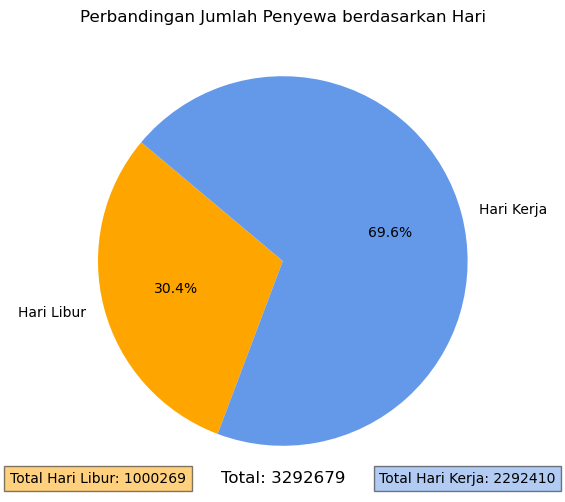

In [17]:
workingday_counts = day_df.groupby("workingday")["cnt"].sum()


labels = ["Hari Libur", "Hari Kerja"]
counts = workingday_counts.tolist()
colors = ['orange', '#6499E9']


plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Perbandingan Jumlah Penyewa berdasarkan Hari')
total_count = sum(counts)
plt.text(0, -1.2, f'Total: {total_count}', fontsize=12, ha='center')
total_workday = workingday_counts[1]
total_holiday = workingday_counts[0]


plt.text(1.0, -1.2, f'Total Hari Kerja: {total_workday}', fontsize=10, ha='center', bbox=dict(facecolor='#6499E9', alpha=0.5))
plt.text(-1.0, -1.2, f'Total Hari Libur: {total_holiday}', fontsize=10, ha='center', bbox=dict(facecolor='orange', alpha=0.5))

plt.show()

In [19]:
day_df.to_csv("main_data.csv", index=False)

## Conclusion

- Bagaimana tren penggunaan sepeda  setiap bulan dan tahun? Apakah ada peningkatan atau penurunan yang signifikan?

    * Bulan = Dari chart diatas dapat disimpulkan bahwa tren penyewaan sepeda setiap bulannya sangat fluktuatif, terjadi naik turun. Tren penyewaan sepeda tertinggi terjadi pada bulan agustus dan terendah pada bulan january
    * Tahun = untuk tren penyewaan sepeda setiap tahunnya terjadi peningkatan dari yang sebelumnya 1.243.103 menjadi 2.049.576

- Bagaimana pola penggunaan sepeda berdasarkan hari kerja  dan hari libur? Apakah ada perbedaan yang signifikan?

    * Terjadi perbedaan signifikan penyewaan sepeda pada hari keja dan hari libur. hal ini menunjukkan bahwa pengguna sepeda  lebih serinng menyewa sepeda saat hari kerja